## EJECUTA ESTA CELDA PARA AUTENTICARTE CON TU CUENTA DE GMAIL


In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

ejecuta esta celda para que sus funciones estén disponible en el problemset.

In [1]:
from sklearn.datasets import *
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2Ddata_with_boundary(predict,X,y):
    n = 200
    mins,maxs = np.min(X,axis=0), np.max(X,axis=0)
    mins -= np.abs(mins)*.2
    maxs += np.abs(maxs)*.2
    d0 = np.linspace(mins[0], maxs[0],n)
    d1 = np.linspace(mins[1], maxs[1],n)
    gd0,gd1 = np.meshgrid(d0,d1)
    D = np.hstack((gd0.reshape(-1,1), gd1.reshape(-1,1)))
    p = (predict(D)*1.).reshape((n,n))
    plt.contourf(gd0,gd1,p, levels=[-0.1,0.5], alpha=0.5, cmap=plt.cm.Greys)
    plt.scatter(X[y==0][:,0], X[y==0][:,1], c="blue")
    plt.scatter(X[y==1][:,0], X[y==1][:,1], c="red")


## Ejercicio 1: Características polinomiales

Completa la función `map_features` para expandir X con características polinomiales según la variable de clase `self.pols`, creando un conjunto de columnas nuevo elevando las originales con cada elemento de `self.pols`. Por ejemplo, si `self.pols`
 es `[2,5]`, la expansión de
 
      1  2
      3  2
      2  1
      
sería

      1  2  1  4   1   32
      3  2  9  4  243  32
      2  1  4  1   32   1
      
completa el resto de las funciones de la clase `LR` según el problemset de la lección anterior correspondiente, usando la aproximación basade en regresión logística (con $g$ como función sigmoide).

$$J(\theta) = \frac{1}{m}\sum_{i=0}^{m-1} (y^{(i)}-g(\theta\mathbf{x}^{(i)}))^2$$ 

observa que $\mathbf{X}$ ahora se refiere al dataset con (1) una columna de unos añadida; y (2) la expansión de características polinomiales

In [ ]:
def LR(**args): # hack for inspect to work with classes
    from scipy.optimize import minimize
    import numpy as np
    
    class LR_class:
        
        def __init__(self, pols):
            self.pols = pols
        
        def map_features(self, X):
            rX = ...       
            return rX

        def fit(self, X, y):
            X = np.hstack((np.ones((len(X),1)), X))
            X = self.map_features(X)
            def cost(t):
                return ...
                             
            r = minimize(cost, np.ones(X.shape[1])*-.11+np.random.random(X.shape[1])*.1, method="BFGS")
            self.theta = r.x  

        def predict(self, X):
            X = np.hstack((np.ones((len(X),1)), X))
            X = self.map_features(X)
            return (self.g(X.dot(self.theta))>0.5)*1

        def g(self, X):
            return 1/(1+np.exp(-X))

        def score(self, X,y):
            return np.sum(self.predict(X)==y)*1./len(X)
        
    return LR_class(**args)

import urllib, inspect
src1 = urllib.quote_plus(inspect.getsource(LR))

comprueba tu código

In [ ]:
import numpy as np
X = np.array([[1, 2], [3,2], [2,1]])
lr = LR(pols=[2,5])
lr.map_features(X)

observa las fronteras de clasificación que se generan

In [ ]:
data = np.loadtxt("data/logregdata.csv", delimiter=",", skiprows=1)
X,y = data[:,:2], data[:,2]

plt.figure(figsize=(15,3))

for i,pols in enumerate([[], [2], [3], [2,4]]):
    plt.subplot(1,4,i+1)
    lr = LR(pols=pols)
    lr.fit(X,y)
    plot_2Ddata_with_boundary(lr.predict, X,y)
    plt.title("pols="+str(list(pols)))
    

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS5_1 $src1

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS5_1 $src1

## Ejercicio 2: Regularización

Implementa la función de coste y gradiente de aproximación probabilística para regresión logística, pero con regularización:

$$J(\theta) = -l(\theta) = \frac{1}{m}\sum_{i=0}^{m-1}y_i log(g(\mathbf{x}_i\theta))+(1-y_i) log(1-g(\mathbf{x}_i\theta))+ \lambda ||\theta||^2$$

$$\nabla J= \frac{1}{m}2X^{T}\cdot(Y-g(X\cdot\theta)) + 2\lambda||\theta||$$

En donde los argumentos `t` y `reg` representan $\theta$ y $\lambda$ respectivamente. 


In [ ]:
def g(X):
    return 1/(1+np.exp(-X))
        
def cost(X, y, t, reg):
    return ...

def grad(X, y, t, reg):
    return ...

import urllib, inspect
src2 = urllib.quote_plus(inspect.getsource(cost)+"\n"+inspect.getsource(grad))


comprueba tu código. el coste y gradientes en la configuración siguiente deben de ser 2.599 y [1.2, 1.65] respectivamente

In [ ]:
data = np.loadtxt("data/logregdata.csv", delimiter=",", skiprows=1)
X,y = data[:,:2], data[:,2]

t = np.ones(X.shape[1])*2
reg = 0.2

print "cost", cost(X,y,t,reg)
print "grad", grad(X,y,t,reg)

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS5_2 $src2

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS5_2 $src1

## Ejercicio 3: Cross validation

Fíjate cómo funciona un particionador de un dataset para cross validation

In [7]:
from sklearn.cross_validation import KFold
import numpy as np
X = np.random.randint(10, size=(20,2))
from sklearn.tree import DecisionTreeClassifier
print X
print "--"
for itr, its in KFold(len(X), 4):
    print "index train", itr, "index test", its
#    print X[itr]
#    print X[its]
        

[[7 3]
 [3 1]
 [1 2]
 [2 1]
 [3 6]
 [9 0]
 [3 4]
 [1 0]
 [2 6]
 [5 9]
 [4 8]
 [3 9]
 [5 4]
 [6 5]
 [6 5]
 [8 2]
 [7 1]
 [8 4]
 [3 4]
 [0 2]]
--
index train [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] index test [0 1 2 3 4]
index train [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19] index test [5 6 7 8 9]
index train [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19] index test [10 11 12 13 14]
index train [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] index test [15 16 17 18 19]


completa la función siguiente para que dado un estimador, un dataset y un número de _folds_:
    
- itere sobre un `KFold` con los _folds_ especificados y en cada iteración:
    - entrene el estimador con la parte del dataset especificada por los índices de entrenamiento (el dataset de entrenamiento)
    - calcule el score con el dataset de entrenamiento
    - calcule el score con el dataset de test
- finalmente, la función tendrá que devolver la media y desviación estándar de los scores de entrenamiento y test obtenidos durante la iteración.

In [ ]:
def crossval_estimator(estimator, X,y, n_folds=5):
    from sklearn.cross_validation import KFold
    sctr, scts = [],[]
    for itr, its in KFold(len(X), n_folds):
        X_train = ...
        y_train = ...
        X_test  = ...
        y_test  = ...

        estimator.fit(...)
        
        sctr.append(...)
        scts.append(...)
    return np.mean(sctr), np.std(sctr), np.mean(scts), np.std(scts)

import urllib, inspect
src3 = urllib.quote_plus(inspect.getsource(crossval_estimator))


Comprueba tu código, debería de darte una curva como esta en la que se ve el impacto de variar un parámetro del estimador

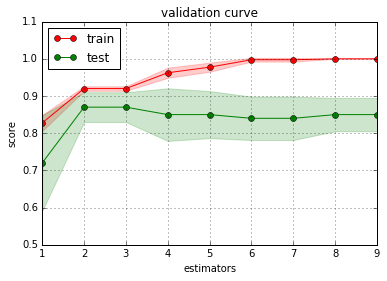

In [26]:
from IPython.display import Image
Image(filename='imgs/dt-depth.png')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def crossval_estimators(estimators,X,y):
    meanstr, stdstr = [], []
    meansts, stdsts = [], []
    for estimator in estimators:
        mstr, sstr, msts, ssts = crossval_estimator(estimator, X, y, 5)
        meanstr.append(mstr)
        stdstr.append(sstr)
        meansts.append(msts)
        stdsts.append(ssts)

    return [np.array(i) for i in meanstr, meansts, stdstr, stdsts]

data = np.loadtxt("data/logregdata.csv", delimiter=",", skiprows=1)
X,y = data[:,:2], data[:,2]
rngs = range(1,10,1)
estimators = [DecisionTreeClassifier(max_depth=i) for i in rngs]

def plot_cv_estimators(estimators, rngs, X,y):
    meanstr, meansts, stdstr, stdsts = crossval_estimators(estimators,X,y)

    plt.grid()
    plt.plot(rngs, meanstr, "o-", color="red", label="train")
    plt.fill_between(rngs, meanstr-stdstr, meanstr+stdstr, color="red", alpha=.2)

    plt.plot(rngs, meansts, "o-", color="green", label="test")
    plt.fill_between(rngs, meansts-stdsts, meansts+stdsts, color="green", alpha=.2)
    plt.xlabel("estimators")
    plt.ylabel("score")
    plt.legend(loc="best")
    plt.title("validation curve")
    
plot_cv_estimators(estimators, rngs, X,y)

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS5_3 $src3

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS5_3 $src3

## Ejercicio 4: Selección de modelos

Cuando queremos seleccionar o calibrar los parámetros de un modelo debemos de separar una parte del dataset para realizar el proceso de selección y otra parte para medir el desempeño del modelo que se seleccione. De esta manera, evitamos sesgos estadísticos en el desempeño final reportado.

Por tanto, dada una lista de estimadores y un datset:

- Dividimos el dataset en dos partes: una para hacer la selección de modelos (`Xsel`, `ysel`) y otra para medir el desempeño del modelo elegido (`Xtest`, `ytest`)

- Usamos un método de validación sobre `Xsel`/`ysel` sobre cada estimador y obtenemos un score de desempeño para cada uno de ellos. Esto es el **score de validación** de cada estimador. Observa que, dependiendo del método de validación, se crearán a su vez varias particiones de `Xsel`/`ysel` para entrenar y medir la capacidad de generalización de cada estimador.

- Seleccionamos el estimador que tenga el mejor score de validación.

- Entrenamos el estimador seleccionado con **TODOS LOS ELEMENTOS** de `Xsel`/`ysel`

- Medimos el desempeño del estimador con `Xtest`/`ytest`. Observa que esta es la **ÚNICA VEZ** que usamos estos datos.

Completa la función siguiente para que dado una lista de estimadores y las particiones `Xsel`/`ysel` y `Xtest`/`ytest`:

1. Realice un cross validation para cada estimador con `Xsel`/`ysel` y obtenga el promedio de desempeño de 5 folds. Usa la función [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) y la clase [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) para el argumento `cv`. 
2. Determine cual es el estimador con mayor score promedio (*best_estimator*)
3. Entrene *best_estimator* con `Xsel`/`ysel`
4. Mida el score de *best_estimator* con `Xtest`/`ytest`
5. Devuelva:
   - *best_estimator*
   - el score  promedio de *best_estimator* en la fase de cross validation
   - el score de *best_estimator* con `Xtest`/`ytest`

In [ ]:
def select_model(estimators, Xsel, ysel, Xtest, ytest):
    from sklearn.cross_validation import cross_val_score, KFold
    means=[]
    for estimator in estimators:
        sc = cross_val_score(....)
        means.append(np.mean(sc))

    best_estimator      = ...
    best_crossval_score = ...
    best_estimator.fit(...)
    best_score = best_estimmator.score(...)
    return best_estimator, best_crossval_score, best_score

import urllib, inspect
src4 = urllib.quote_plus(inspect.getsource(select_model))

Comprueba tu código. La siguiente prueba muestrea  Xsel y Xtest y realiza el proceso de selección de modelo 100 veces. En promedio, el mejor `max_depth` debería de ser alrededor de 2.4, el score de cross validacion sobre 0.76 y el score de test sobre 0.74. Como cada vez se genera un dataset nuevo con `make_moons` el proceso es estocástico.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

data = np.loadtxt("data/logregdata.csv", delimiter=",", skiprows=1)
X,y = data[:,:2], data[:,2]

a = []
n=50
for i in range(100):
    X,y = make_moons(200, noise=.5)
    estimators = [DecisionTreeClassifier(max_depth=i) for i in range(1,5,1)]

    Xs, ys = X[:n], y[:n]
    Xt, yt = X[n:], y[n:]

    best, sc1, sc2 = select_model(estimators, Xs, ys, Xt, yt)
    a.append([sc1, sc2, best.max_depth])
print "scores    cv    test    max_depth"
print "promedios %.3f %.3f   %.3f"%tuple(np.mean(np.array(a), axis=0))
print "stds      %.3f %.3f   %.3f"%tuple(np.std(np.array(a), axis=0))


#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS5_4 $src4

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS5_4 $src4

## Ejercicio 5: Resampling for learning curve

Fíjate cómo usamos una permutación para escoger aleatoriamente particiones de un vector. Observa que la permutación se usa para indexar los elementos del vector y los elementos escogidos son aleatorios y no se superponen.

In [9]:
#v = np.random.randint(100, size=10)+100
#v = np.random.randint(10, size=10)+100
print "Original vector", v
p = np.random.permutation(len(v))
print "Permutation", p
print "6 first elements of permutation", p[:6]
print "3 last elements of permutation ", p[-3:]
print "6 random elements (from the start)", v[p[:6]]
print "3 random elements (from the end)  ", v[p[-3:]]

Original vector [103 101 101 100 102 100 107 105 101 108]
Permutation [0 7 2 6 8 1 5 9 3 4]
6 first elements of permutation [0 7 2 6 8 1]
3 last elements of permutation  [9 3 4]
6 random elements (from the start) [103 105 101 107 101 101]
3 random elements (from the end)   [108 100 102]


Completa la función siguiente para que, dado un un estimador y un dataset `X/y`, repita `n_reps` veces el siguiente proceso, con `test_size` y `train_size`:

- Escoja aleatoriamente un conjunto de elementos de entrenamiento de `X/y` de según `train_size` (p.ej., 0.2 indica el 20% de los datos)
- Escoja aleatoriamente un conjunto de elementos de test de `X/y` de según `test_size` (p.ej., 0.2 indica el 20% de los datos). Estos datos **han de ser distintos** de los de entrenamiento. Puedes usar la técnica con permutaciones anterior. Asume que `test_size` + `train_size` es menor que 1.
- Entrene el estimador con los elementos de entrenamiento seleccionados
- Calcule el score con los datos de entrenamiento y con los de test

La función ha de devolver dos listas de longitud `n_reps`, una con los scores de entrenamiento obtenidos y otra con los scores de test. Observa que en **cada repetición** hay que muestrear **nuevos** conjuntos de entrenamiento y de test.

In [ ]:
def lc_point(estimator, X, y, train_size, test_size, n_reps):

    if train_size + test_size > 1.:
        raise ValueError("train size and test size must add up to 1 or less")        
    tr_size = int(len(X)*train_size)
    ts_size = int(len(X)*test_size)
    sc_train, sc_test = [], []
    for i in range(n_reps):

        X_train, y_train = ...
        X_test, y_test   = ...
        
        estimator.fit(...)
        sc_train.append(estimator.score(...))
        sc_test.append(estimator.score(...))
    return sc_train, sc_test

import urllib, inspect
src5 = urllib.quote_plus(inspect.getsource(lc_point))

Comprueba tu código. El promedio con 1000 repeticiones en train y test ha de ser 0.75 y 0.66 aprox.

In [ ]:
X,y = make_circles(300, noise=.1)
estimator = DecisionTreeClassifier(max_depth=3)
tr, ts = lc_point(estimator, X, y, .5,.5,1000)
np.mean(tr), np.mean(ts)

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS5_5 $src5

#### submit your answer (you must be connected to internet)

**YA ACABASTE EL PROBLEMSET**. Ahora si quieres experimenta con tu código. Las siguientes celdas generan curvas de aprendizaje y muestran fronteras de clasificación con árboles de decisión más y menos complejos y datasets más y menos ruidosos.

In [ ]:
from sklearn.linear_model import LogisticRegression

def plot_lc(estimator, X,y, train_sizes, test_size, n_reps=10):
    r = np.array([[np.mean(tr), np.std(tr), np.mean(ts), np.std(ts)] \
                   for tr, ts in [lc_point(estimator, X,y, s,test_size, n_reps) \
                   for s in train_sizes]])

    plt.plot(train_sizes, r[:,0], "o-", color="red", label="train")
    plt.fill_between(train_sizes, r[:,0]-r[:,1], r[:,0]+r[:,1], alpha=.1, color="red")

    plt.plot(train_sizes, r[:,2], "o-", color="green", label="test")
    plt.fill_between(train_sizes, r[:,2]-r[:,3], r[:,2]+r[:,3], alpha=.1, color="green")
    plt.legend(loc="best")
    plt.ylim(0,1.05); plt.xlim(train_sizes[0]*.80,train_sizes[-1]*1.05); plt.grid()
    plt.xticks(train_sizes, [int(s*len(X)) for s in train_sizes])
    plt.yticks(np.linspace(0,1,11));
    plt.xlabel("train set size")
    plt.title("learning curve for test size "+str(test_size))
    plt.ylabel("score")

In [ ]:
X,y = make_circles(300, noise=.1)
test_size=.5
est1, est2 = DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=15)
train_sizes = np.linspace(.1,.5,10)

plt.figure(figsize=(15,4))
plt.subplot(131)
plot_lc(est1, X,y, train_sizes, test_size, n_reps=10)
plt.subplot(132)
plot_lc(est2, X,y, train_sizes, test_size, n_reps=10)
plt.subplot(133)
X,y = make_circles(300, noise=1e-5)
plot_lc(est2, X,y, train_sizes, test_size, n_reps=10)


juega con distintos valores del ruido en la generación del dataset

In [ ]:
n=300
X,y = make_circles(n, noise=.1)
Xtr, ytr, Xts, yts = X[:n/3], y[:n/3], X[-n/2:], y[-n/2:]
est1.fit(Xtr, ytr);est2.fit(Xtr, ytr)
plt.figure(figsize=(9,8))
plt.subplot(221);plot_2Ddata_with_boundary(est1.predict, Xtr, ytr); plt.title("estimator 1 TRAIN data %.2f"%est1.score(Xtr,ytr))
plt.subplot(222);plot_2Ddata_with_boundary(est1.predict, Xts, yts); plt.title("estimator 1 TEST data %.2f"%est1.score(Xts,yts))
plt.subplot(223);plot_2Ddata_with_boundary(est2.predict, Xtr, ytr); plt.title("estimator 2 TRAIN data %.2f"%est2.score(Xtr,ytr))
plt.subplot(224);plot_2Ddata_with_boundary(est2.predict, Xts, yts); plt.title("estimator 2 TEST data %.2f"%est2.score(Xts,yts))
